# 1- Preliminary preprocessing

## 1-1 Import Libraries and Load Dataset

In [30]:
# import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, Dropout, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import seaborn as sns

In [31]:
# Load Dataset
df= pd.read_csv('/content/data-forecast.csv')
df

,Date,WeekDays,MonthWeeks,Year,Month,Day,IsHolliday,IsBeforeHolliday,YearMonth,Occastion_ID,...,Ramadan,IsAfterHolliday,BeforeWeekend,LongWeekend,AfterWeekend,StartOfLongWeekend,LeftOfLongWeekend,LastWeekOfYear,NourozHolliday,NourozHolliday_Coef
0,14010102,4,1,1401,1,2,1,0,140101,10,...,0,0,0,0,0,0,3,0,1,0.7
1,14010103,5,1,1401,1,3,1,0,140101,0,...,0,0,0,0,0,0,2,0,1,0.7
2,14010104,6,1,1401,1,4,1,0,140101,0,...,0,0,0,0,0,0,1,0,1,0.7
3,14010105,7,1,1401,1,5,1,0,140101,0,...,0,0,0,0,0,0,0,0,1,0.7
4,14010106,1,2,1401,1,6,0,0,140101,0,...,0,1,0,0,0,0,0,0,1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,14030206,6,2,1403,2,6,0,1,140302,0,...,0,0,0,0,0,0,0,0,0,1.0
764,14030207,7,2,1403,2,7,1,0,140302,0,...,0,0,0,0,0,0,0,0,0,1.0
765,14030208,1,3,1403,2,8,0,0,140302,0,...,0,1,0,0,0,0,0,0,0,1.0
766,14030209,2,3,1403,2,9,0,0,140302,0,...,0,0,0,0,0,0,0,0,0,1.0


## 1-2 The first step of preprocessing

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 768 non-null    int64  
 1   WeekDays             768 non-null    int64  
 2   MonthWeeks           768 non-null    int64  
 3   Year                 768 non-null    int64  
 4   Month                768 non-null    int64  
 5   Day                  768 non-null    int64  
 6   IsHolliday           768 non-null    int64  
 7   IsBeforeHolliday     768 non-null    int64  
 8   YearMonth            768 non-null    int64  
 9   Occastion_ID         768 non-null    int64  
 10  WeightQTY            768 non-null    float64
 11  GrossAmount          768 non-null    float64
 12  DiscountAmount       768 non-null    float64
 13  Ramadan              768 non-null    int64  
 14  IsAfterHolliday      768 non-null    int64  
 15  BeforeWeekend        768 non-null    int

In [33]:
columns_name = df.columns.tolist()
columns_name

['Date',
 'WeekDays',
 'MonthWeeks',
 'Year',
 'Month',
 'Day',
 'IsHolliday',
 'IsBeforeHolliday',
 'YearMonth',
 'Occastion_ID',
 'WeightQTY',
 'GrossAmount',
 'DiscountAmount',
 'Ramadan',
 'IsAfterHolliday',
 'BeforeWeekend',
 'LongWeekend',
 'AfterWeekend',
 'StartOfLongWeekend',
 'LeftOfLongWeekend',
 'LastWeekOfYear',
 'NourozHolliday',
 'NourozHolliday_Coef']

In [34]:
# List of binary features
binary_features = ['IsHolliday', 'IsBeforeHolliday', 'Ramadan', 'IsAfterHolliday', 'BeforeWeekend',
                   'LongWeekend', 'AfterWeekend', 'StartOfLongWeekend',
                   'LastWeekOfYear', 'NourozHolliday'
                  ]

# Loop through all binary features and print the count of each class (0 and 1)
for col in binary_features:
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    print()


Counts for IsHolliday:
IsHolliday
0    606
1    162
Name: count, dtype: int64

Counts for IsBeforeHolliday:
IsBeforeHolliday
0    641
1    127
Name: count, dtype: int64

Counts for Ramadan:
Ramadan
0    681
1     87
Name: count, dtype: int64

Counts for IsAfterHolliday:
IsAfterHolliday
0    640
1    128
Name: count, dtype: int64

Counts for BeforeWeekend:
BeforeWeekend
0    735
1     33
Name: count, dtype: int64

Counts for LongWeekend:
LongWeekend
0    668
1    100
Name: count, dtype: int64

Counts for AfterWeekend:
AfterWeekend
0    739
1     29
Name: count, dtype: int64

Counts for StartOfLongWeekend:
StartOfLongWeekend
0    738
1     30
Name: count, dtype: int64

Counts for LastWeekOfYear:
LastWeekOfYear
0    754
1     14
Name: count, dtype: int64

Counts for NourozHolliday:
NourozHolliday
0    729
1     39
Name: count, dtype: int64



In [35]:
# List of categorical features
categorical_features = ['MonthWeeks','YearMonth','LeftOfLongWeekend','Occastion_ID','Month','WeekDays','Year']

# Loop through all categorical features and print the count of each class
for col in categorical_features:
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    print()

Counts for MonthWeeks:
MonthWeeks
2    182
3    178
4    174
5    142
1     79
6     13
Name: count, dtype: int64

Counts for YearMonth:
YearMonth
140202    31
140103    31
140104    31
140301    31
140106    31
140206    31
140201    31
140102    31
140203    31
140204    31
140205    30
140211    30
140210    30
140209    30
140208    30
140207    30
140101    30
140111    30
140110    30
140109    30
140108    30
140107    30
140105    30
140112    29
140212    29
140302    10
Name: count, dtype: int64

Counts for LeftOfLongWeekend:
LeftOfLongWeekend
0    676
1     34
2     31
3     18
4      6
7      1
6      1
5      1
Name: count, dtype: int64

Counts for Occastion_ID:
Occastion_ID
0     595
1      87
13     54
6      18
12      3
2       2
4       2
7       2
8       2
5       2
10      1
Name: count, dtype: int64

Counts for Month:
Month
1     92
2     72
3     62
4     62
6     62
5     60
7     60
8     60
9     60
10    60
11    60
12    58
Name: count, dtype: int64

Counts 

In [36]:
# List of continuous features
continuous_columns = ['WeightQTY', 'GrossAmount', 'DiscountAmount','NourozHolliday_Coef']

# Use .describe() to get summary statistics for the continuous features
df[continuous_columns].describe()


,WeightQTY,GrossAmount,DiscountAmount,NourozHolliday_Coef
count,768.000000,768.000000,768.000000,768.000000
mean,6405.422783,829.228485,72.310570,0.984766
std,1510.953576,388.430290,55.225581,0.065908
min,362.009800,40.368340,6.144464,0.700000
25%,5371.422000,485.914326,22.472384,1.000000
50%,6337.600025,800.600206,60.083199,1.000000
75%,7394.563275,1152.999099,113.091156,1.000000
max,12614.080000,2073.347750,311.500397,1.000000


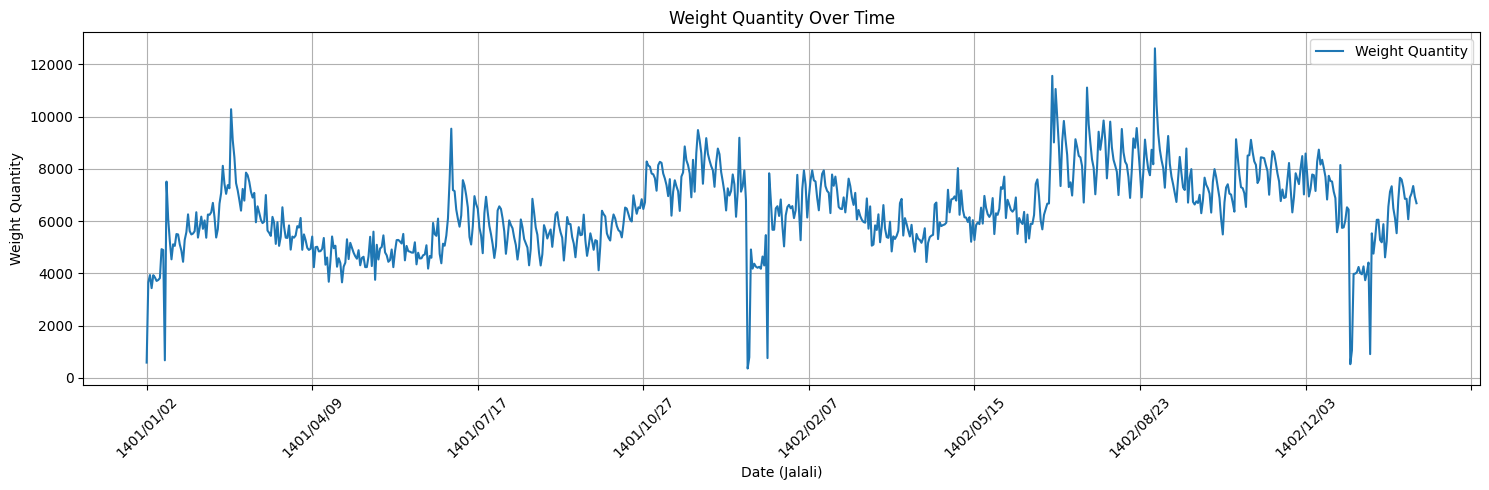

In [37]:
# Convert the 'Date' column to string and store it in a new column called 'DateStr'
df['DateStr'] = df['Date'].astype(str)

# Format the 'Date' strings into 'YYYY/MM/DD' format and store in 'DateLabel' column
df['DateLabel'] = df['Date'].astype(str).str.replace(r'(\d{4})(\d{2})(\d{2})', r'\1/\2/\3', regex=True)

# Import required libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the 'WeightQTY' against formatted dates
plt.plot(df['DateLabel'], df['WeightQTY'], label='Weight Quantity')

# Set axis labels and plot title
plt.xlabel('Date (Jalali)')
plt.ylabel('Weight Quantity')
plt.title('Weight Quantity Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Limit the number of ticks on the x-axis to avoid clutter
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Enable grid, adjust layout, and show legend
plt.grid(True)
plt.tight_layout()
plt.legend()

# Display the plot
plt.show()


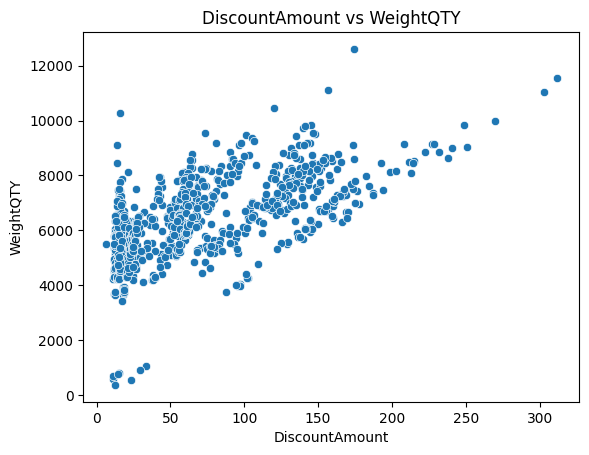

In [38]:
sns.scatterplot(x='DiscountAmount',y= 'WeightQTY',data = df)
plt.title('DiscountAmount vs WeightQTY')
plt.show()

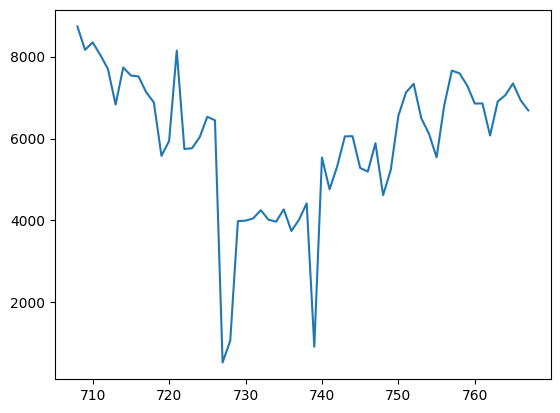

In [39]:
two_months = 60
df_new = df[-two_months:]
plt.plot(df_new['WeightQTY'])

## 1-3 Feature Importance Analysis

In [40]:
# Import one-way ANOVA from scipy (used to test differences in means between categories)

from scipy.stats import f_oneway

# Create a list of 'WeightQTY' values for each unique month (grouped by 'Month')
groups = [df[df['Month'] == cat]['WeightQTY'] for cat in df['Month'].unique()]

# Perform one-way ANOVA test to check if there's a significant difference between the monthly groups
f_stat, p_val = f_oneway(*groups)

# Print the p-value to evaluate statistical significance
print(p_val)


8.655261523339497e-69


In [41]:
# Import the independent t-test function from scipy(used to test differences in means between binaries)
from scipy.stats import ttest_ind

# Extract 'WeightQTY' values for non-holiday days
group0 = df[df['IsHolliday'] == 0]['WeightQTY']

# Extract 'WeightQTY' values for holiday days
group1 = df[df['IsHolliday'] == 1]['WeightQTY']

# Perform an independent t-test to compare means between holiday and non-holiday groups
t_stat, p_val = ttest_ind(group0, group1)

# Print the p-value to determine statistical significance
print(p_val)


0.01266648850998375


In [42]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson correlation (measures linear relationship between two continuous variables)
pearson_corr, pearson_p = pearsonr(df['NourozHolliday_Coef'], df['WeightQTY'])

# Calculate Spearman correlation (measures monotonic relationship, based on ranks)
spearman_corr, spearman_p = spearmanr(df['NourozHolliday_Coef'], df['WeightQTY'])

# Print the correlation coefficients and their corresponding p-values
print(f"Pearson corr: {pearson_corr:.3f} (p={pearson_p:.3f})")
print(f"Spearman corr: {spearman_corr:.3f} (p={spearman_p:.3f})")


Pearson corr: 0.437 (p=0.000)
Spearman corr: 0.350 (p=0.000)


## 1-4 Transforming categorical data into cyclical features

In [43]:
# Define the categorical features that will be converted to cyclical features
categorical_features = ['WeekDays', 'Month', 'Day']

# Convert the 'WeekDays' feature into cyclical format using sine and cosine transformations
df['weekday_sin'] = np.sin(2 * np.pi * df['WeekDays'] / 7)  # Sine transformation for weekdays
df['weekday_cos'] = np.cos(2 * np.pi * df['WeekDays'] / 7)  # Cosine transformation for weekdays

# Convert the 'Month' feature into cyclical format using sine and cosine transformations
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)  # Sine transformation for months
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)  # Cosine transformation for months

# Convert the 'Day' feature into cyclical format using sine and cosine transformations
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)  # Sine transformation for days of the month
df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)  # Cosine transformation for days of the month



In [44]:
# Convert the 'Year' column into dummy/indicator variables using pd.get_dummies
df = pd.get_dummies(df, columns=['Year'], prefix='year')

# Define the binary columns corresponding to each unique year
binary_columns = ['year_1401', 'year_1402', 'year_1403']

# Convert the dummy columns to integers (from boolean/float) for further analysis
df[binary_columns] = df[binary_columns].astype(int)


In [45]:
# Sort the dataframe by the 'Date' column in ascending order and reset the index
df = df.sort_values(by='Date').reset_index(drop=True)

# 2- Feature Engineering

## 2-1 Feature Extraction

In [46]:
# Create a binary feature indicating whether the day is within the first 3 days of the month
df['IsStartOfMonth'] = (df['Day'] <= 3).astype(int)

# Create a binary feature indicating whether the day is within the last 3 days of the month (28th or later)
df['IsEndOfMonth'] = (df['Day'] >= 28).astype(int)

# Display the updated dataframe
df


,Date,WeekDays,MonthWeeks,Month,Day,IsHolliday,IsBeforeHolliday,YearMonth,Occastion_ID,WeightQTY,...,weekday_cos,month_sin,month_cos,day_sin,day_cos,year_1401,year_1402,year_1403,IsStartOfMonth,IsEndOfMonth
0,14010102,4,1,1,2,1,0,140101,10,588.74300,...,-0.900969,0.500000,0.866025,0.394356,0.918958,1,0,0,1,0
1,14010103,5,1,1,3,1,0,140101,0,3657.18000,...,-0.222521,0.500000,0.866025,0.571268,0.820763,1,0,0,1,0
2,14010104,6,1,1,4,1,0,140101,0,3940.04700,...,0.623490,0.500000,0.866025,0.724793,0.688967,1,0,0,0,0
3,14010105,7,1,1,5,1,0,140101,0,3437.76000,...,1.000000,0.500000,0.866025,0.848644,0.528964,1,0,0,0,0
4,14010106,1,2,1,6,0,0,140101,0,3933.57000,...,0.623490,0.500000,0.866025,0.937752,0.347305,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,14030206,6,2,2,6,0,1,140302,0,6905.05390,...,0.623490,0.866025,0.500000,0.937752,0.347305,0,0,1,0,0
764,14030207,7,2,2,7,1,0,140302,0,7060.82700,...,1.000000,0.866025,0.500000,0.988468,0.151428,0,0,1,0,0
765,14030208,1,3,2,8,0,0,140302,0,7346.11565,...,0.623490,0.866025,0.500000,0.998717,-0.050649,0,0,1,0,0
766,14030209,2,3,2,9,0,0,140302,0,6933.31635,...,-0.222521,0.866025,0.500000,0.968077,-0.250653,0,0,1,0,0


In [47]:
# Calculate the discount rate as the ratio of DiscountAmount to GrossAmount
df['DiscountRate'] = df['DiscountAmount'] / df['GrossAmount']
df['DiscountRate'].describe()

,DiscountRate
count,768.000000
mean,0.078042
std,0.034450
min,0.012255
25%,0.046174
50%,0.074632
75%,0.098807
max,0.271062


In [48]:
Unuseful_features = ['MonthWeeks','YearMonth','LeftOfLongWeekend','Occastion_ID','GrossAmount','DiscountAmount']

binary_features = ['IsHolliday', 'IsBeforeHolliday','Ramadan', 'IsAfterHolliday', 'BeforeWeekend',
                   'LongWeekend', 'AfterWeekend', 'StartOfLongWeekend',
                   'LastWeekOfYear', 'NourozHolliday','IsStartOfMonth'
                  ]

Used_categorical_features = ['WeekDays','Month', 'Day','Year']
Used_continuous_features = ['DiscountRate','NourozHolliday_Coef']
target = ['WeightQTY']

## 2-2 Feature Selection

In [49]:
# Select features
selected_columns = [
    'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'day_sin',
    'day_cos', 'year_1401', 'year_1402', 'year_1403',
    'DiscountRate', 'NourozHolliday_Coef', 'IsHolliday', 'IsBeforeHolliday',
    'Ramadan', 'IsAfterHolliday', 'BeforeWeekend',
    'LongWeekend', 'AfterWeekend', 'IsStartOfMonth', 'IsEndOfMonth',
    'NourozHolliday', 'WeightQTY'
]
df_selected = df[selected_columns]
df_selected

,weekday_sin,weekday_cos,month_sin,month_cos,day_sin,day_cos,year_1401,year_1402,year_1403,DiscountRate,...,IsBeforeHolliday,Ramadan,IsAfterHolliday,BeforeWeekend,LongWeekend,AfterWeekend,IsStartOfMonth,IsEndOfMonth,NourozHolliday,WeightQTY
0,-4.338837e-01,-0.900969,0.500000,0.866025,0.394356,0.918958,1,0,0,0.271062,...,0,0,0,0,0,0,1,0,1,588.74300
1,-9.749279e-01,-0.222521,0.500000,0.866025,0.571268,0.820763,1,0,0,0.087180,...,0,0,0,0,0,0,1,0,1,3657.18000
2,-7.818315e-01,0.623490,0.500000,0.866025,0.724793,0.688967,1,0,0,0.079795,...,0,0,0,0,0,0,0,0,1,3940.04700
3,-2.449294e-16,1.000000,0.500000,0.866025,0.848644,0.528964,1,0,0,0.087516,...,0,0,0,0,0,0,0,0,1,3437.76000
4,7.818315e-01,0.623490,0.500000,0.866025,0.937752,0.347305,1,0,0,0.083668,...,0,0,1,0,0,0,0,0,1,3933.57000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-7.818315e-01,0.623490,0.866025,0.500000,0.937752,0.347305,0,0,1,0.085364,...,1,0,0,0,0,0,0,0,0,6905.05390
764,-2.449294e-16,1.000000,0.866025,0.500000,0.988468,0.151428,0,0,1,0.086909,...,0,0,0,0,0,0,0,0,0,7060.82700
765,7.818315e-01,0.623490,0.866025,0.500000,0.998717,-0.050649,0,0,1,0.085877,...,0,0,1,0,0,0,0,0,0,7346.11565
766,9.749279e-01,-0.222521,0.866025,0.500000,0.968077,-0.250653,0,0,1,0.091127,...,0,0,0,0,0,0,0,0,0,6933.31635


# 3- Final Preprocessing

In [50]:
# Split the data into training and test sets while preserving the time order
# The last 45 records are used as the test set (for time series forecasting)

test_size = 45
train_df = df_selected[:-test_size].copy()
test_df = df_selected[-test_size:].copy()

# Use a single scaler for the target variable to ensure consistency
target_scaler = MinMaxScaler()
train_df['WeightQTY'] = target_scaler.fit_transform(train_df[['WeightQTY']])
test_df['WeightQTY'] = target_scaler.transform(test_df[['WeightQTY']])
# Define the feature columns
feature_cols = [col for col in selected_columns if col != 'WeightQTY']

# 4- Create a Model

This model is inspired by the CLAM architecture proposed in:
"CLAM: A Synergistic Deep Learning Model for Multi-Step Stock Price Trend Forecasting"


In [51]:
# Define the Attention layer
@tf.keras.utils.register_keras_serializable()
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1),
                                initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1),
                                initializer='zeros', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [62]:
# Prepare sequences
def create_sequences(df, seq_length, forecast_length, feature_cols):
    X, y = [], []
    for i in range(len(df) - seq_length - forecast_length + 1):
        # Create sequence of features
        X.append(df[feature_cols].iloc[i:i+seq_length].values)
        # Create forecast target sequence
        y.append(df['WeightQTY'].iloc[i+seq_length:i+seq_length+forecast_length].values)
    return np.array(X), np.array(y)

# Set parameters
SEQ_LENGTH = 60  # Sequence length
FORECAST_LENGTH = 45  # Predicting 45 days ahead

# Create sequences for training
X_train, y_train = create_sequences(train_df, SEQ_LENGTH, FORECAST_LENGTH, feature_cols)

# Time-based validation split (use the last portion of training data for validation)
val_size = int(0.1 * len(X_train))
X_val, y_val = X_train[-val_size:], y_train[-val_size:]
X_train, y_train = X_train[:-val_size], y_train[:-val_size]

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")

Training data shape: (558, 60, 21), (558, 45)
Validation data shape: (61, 60, 21), (61, 45)


In [67]:
# Build model
def create_model(input_shape, output_length):
    inputs = Input(shape=input_shape)

    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(inputs)
    x = Dropout(0.3)(x)

    x = LSTM(200, return_sequences=True)(x)
    x = Dropout(0.3)(x)

    attention = Attention()(x)

    outputs = Dense(output_length)(attention)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse',
                 metrics=[tf.keras.metrics.MeanAbsoluteError(),
                          tf.keras.metrics.RootMeanSquaredError()])

    return model

# Create and train model
model = create_model((SEQ_LENGTH, len(feature_cols)), FORECAST_LENGTH)
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increase epochs, early stopping will prevent overfitting
    batch_size=32,  # Try smaller batch size
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 60, 21)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 60, 128)             │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 200)             │         263,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_4 (Attention)              │ (None, 200)                 │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 45)                  │           9,045 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 280,697 (1.07 MB)

 Trainable params: 280,697 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - loss: 0.1229 - mean_absolute_error: 0.2857 - root_mean_squared_error: 0.3398 - val_loss: 0.0082 - val_mean_absolute_error: 0.0732 - val_root_mean_squared_error: 0.0906 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - loss: 0.0121 - mean_absolute_error: 0.0851 - root_mean_squared_error: 0.1101 - val_loss: 0.0088 - val_mean_absolute_error: 0.0762 - val_root_mean_squared_error: 0.0938 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - loss: 0.0098 - mean_absolute_error: 0.0744 - root_mean_squared_error: 0.0990 - val_loss: 0.0097 - val_mean_absolute_error: 0.0803 - val_root_mean_squared_error: 0.0983 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - loss: 0.0088 - mean_absolute_error: 0.0693 - root_mean_squared_error: 0.0939 - val_loss: 0.0072 - val_mean_absolute_error: 0.0682 - val_root_mean_squared_error: 0.0846 - learning_rate: 0.0010
Epoch 5/100


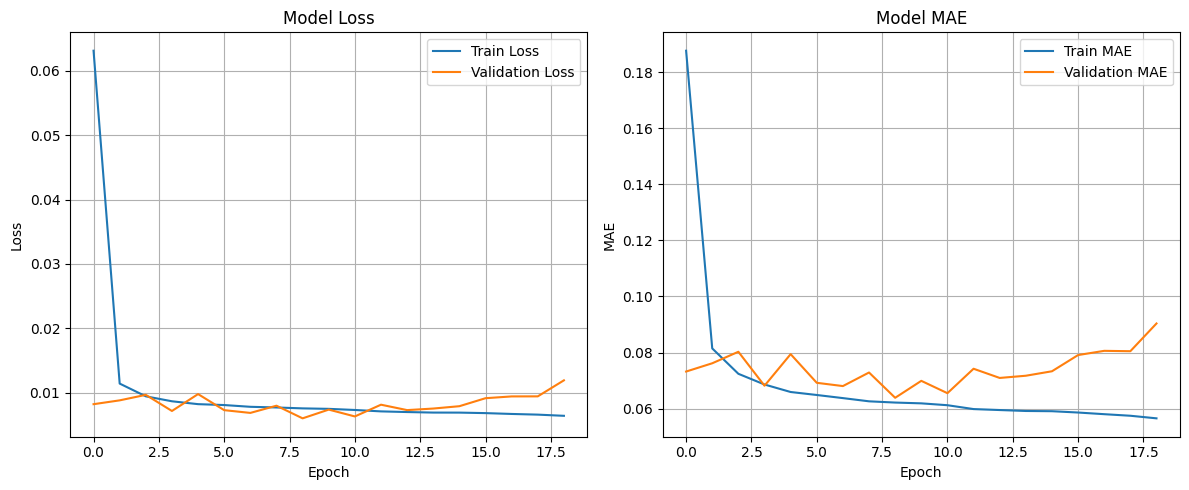

In [68]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5 - Test Data

In [69]:
# Prepare test data
# Create the sequence for prediction using the last SEQ_LENGTH days from training data
# and the first FORECAST_LENGTH days from test data for evaluation
last_train = train_df.iloc[-SEQ_LENGTH:][feature_cols].values  # Last sequence from training
X_test = np.expand_dims(last_train, axis=0)  # Add batch dimension

# Make prediction
y_pred = model.predict(X_test)

# Get actual values from test data
y_actual = test_df['WeightQTY'].iloc[:FORECAST_LENGTH].values

# Inverse transform predictions and actual values
y_pred_denorm = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_actual_denorm = target_scaler.inverse_transform(y_actual.reshape(-1, 1)).flatten()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


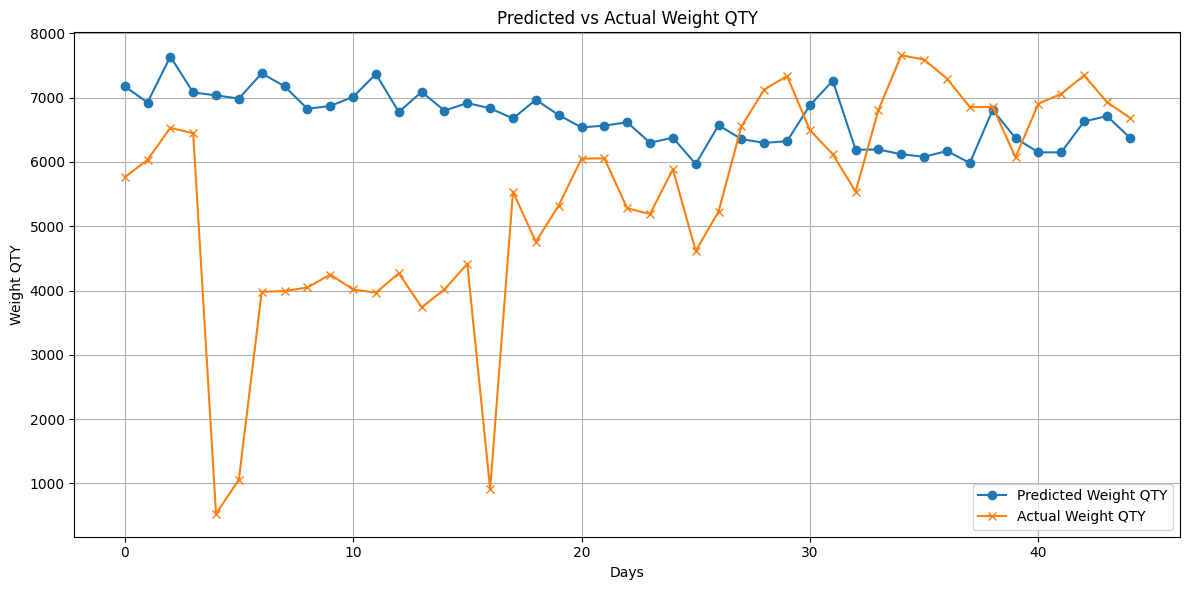

In [70]:
# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(range(FORECAST_LENGTH), y_pred_denorm, marker='o', linestyle='-',
         label='Predicted Weight QTY')
plt.plot(range(FORECAST_LENGTH), y_actual_denorm, marker='x', linestyle='-',
         label='Actual Weight QTY')
plt.title('Predicted vs Actual Weight QTY')
plt.xlabel('Days')
plt.ylabel('Weight QTY')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now we can tune the hyperparameters to improve the model